<a href="https://colab.research.google.com/github/ramirezjc/datasci209-ramirezjc/blob/main/dolly_zoom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Projective Transform

MIDS W281: Computer Vision

## Recommended Libraries

In [ ]:
import numpy as np
from math import sin, cos
import matplotlib.pyplot as plt
from PIL import Image
import os
import imageio
import copy

## Part 1: Pole Height

![Hybrid Teaser](https://raw.githubusercontent.com/W281/fileRepository/main/Assignments/Assignment_1/pole_length.png)

### Overview
Single-view metrology corresponds to a set of techniques for making 3-D measurements from a single 2-D image. Such measurements have several applications including, for example, measuring the height of a suspect in a crime-scene image. We will consider a simple scenario of single-view metrology estimating 3-D measurements of objects in a rendered 2-D image.

### Description

Consider the image shown in Figure 1. You are given the following information about the 3-D scene. There are three poles colored yellow, green, and blue, and a ground plane in this scene. The three poles are perpendicular to the ground plane. The ground plane is parallel to the X-Z plane, and the camera's optical axis is parallel to the Z-axis. Standing at 4 meters, the yellow and green poles are of the same height in the 3-D scene. The distance between these two poles is 17 meters. The green and blue poles are at the same, but unknown, distance from the camera. Finally, the resolution of the image sensor of the camera is 53,333 pixels per meter.

Recall the perspective projection equation that tells us the relationship between a point's location in the 3-D world (X,Y,Z), the camera focal length (f), and the projection of that point in the image (x,y):  
$$\frac{x}{X}=\frac{f}{Z}$$
and
$$\frac{y}{Y}=\frac{f}{Z}$$
&nbsp;

Write a python script to measure the heights and distances between the poles in image coordinates. You may use the pixel locations provided below to estimate the location of the pole endpoints in the image:

$$yellow = [[518, 391],  [512, 987]]$$
$$green = [[733, 462],  [732, 771]]$$
$$blue = [[1189, 311], [1189, 769]]$$

From these image measurements and the 3-D quantities specified above, you will be able to determine the camera focal length and 3-D height of the blue pole.

### Deliverables:

Using the above perspective projection equations, **write code to compute and report**:
- Camera focal length f (in mm)
- 3-D height (Y) of blue pole (in m)

## Part 2: Dolly Zoom

![Hybrid Teaser](https://raw.githubusercontent.com/W281/fileRepository/main/Assignments/Assignment_1/dollys_zoom.gif)

### Overview
Wikipedia defines a dolly zoom (also known as a Hitchcock shot, Vertigo shot, Jaws effect, or Zolly shot) as an in-camera effect that appears to undermine normal visual perception. This effect has been used in many famous [movies](https://www.youtube.com/watch?v=u5JBlwlnJX0). In this part, you will create a simple 3-D scene and simulate the dolly-zoom effect, similar to that shown in Figure 2. This exercise will help you gain familiarity with transforming points between world and sensor coordinates and learn how to use Python image manipulation techniques.

### Description:
The dolly-zoom effect is accomplished by simultaneously adjusting the camera focal length and the distance between the camera and object of interest. Specifically, the effect can be achieved by moving the camera toward the object while simultaneously reducing the camera focal length such that the object remains the same size in the image and the background appears to change in volume relative to the object.

In order to implement this effect, you will create a simple 3-D scene with four planes and a cube, as in Figure 2. For creating this 3-D scene, you are given the following information.

Assume that your camera is looking in the positive Z-direction and has an initial camera focal-length of 300 mm.

You are given the cordinates of the four corners of a fronto-parallel plane (i.e., perpendicular to camera's optical axis) with height and width equal to 400 m:  

$$plane=[[0,0,0], [400,0,0], [400,400,0], [0,400,0]]$$  

You are also given the cordinates of a cube of edge length 12 m and centered at the origin:

$$cube=[[−6,−6,−6], [6,−6,−6], [6,6,−6], [−6,6,−6], [−6,−6,6], [6,−6,6], [6,6,6], [−6,6,6]]$$

Note that both these objects are specified with respect to their own local cordinate systems with the origin at one of their vertices. In order to place the ground plane and cube in the relative locations shown in Figure 2, you need to apply the following rotation and translation to the ground plane and cube:

$$ground:{Rx=90, Ry=0, Rz=0, Tx=−200, Ty=−30, Tz=100}$$
$$cube:{Rx=30, Ry=30, Rz=0, Tx=0, Ty=0, Tz=100}$$

By convention, the order of operations for 3D rotations is $$R = Rz * Ry *Rx$$.

Below we've provided starter code for generating the checkerboard grid pattern, visualizing the scene, constructing the scene objects, and rendering each frame into a movie. In order to create the dolly-zoom animation shown in Figure 2 you will do the following:

1. **Parse:** First you must write code to construct a transformation matrix from the given rotation, translation, and focal length parameters above.
Fill in the `get_projective_matrix` function below. This requires parsing the input transformation parameters, constructing both the intrinsic and extrinsic matrices, and combining these together in the correct order. You must also complete the `transform_points` function by filling in the conversion step from transformed homogeneous points to non-homogenous sensor points.


2. **Place:** We have only provided the specification for the ground plane and the cube. You must create and place the other three planes by specifying their rotations and translations.
In the script below, fill in the correct transformation matrices for the back plane and the two side planes. All planes should be aligned exactly at their edges, should be the same size, and should not overlap or become disjointed as the camera parameters change. Make sure the entire scene is visible in the plot.


3. **Compute:** Calculate the necessary focal lengths and transformations required to achieve the dolly zoom effect.
The dolly zoom requires that you must move the camera and adjust the focal length together such that the cube stays roughly the same size in the projected image. (That is, conceptually, a horizontal line parallel to the image plane and running through the center of the cube would not change in length during the entire dolly zoom.) Write a function to calculate the necessary relationship between Z and f that achieves this effect.


4. **Dolly:** After the 3-D scene is created, start moving the camera forward.  
Move the camera forward while simultaneously adjusting the focal length. Note that moving the camera forward is the same as moving the entire scene towards the camera. Starting with an initial camera-to-cube distance of 100 meters and an initial focal length of 300 mm, and move the camera in 30 steps to a final camera-to-cube distance of 40 meters. Use your formula from step 3 to compute the necessary focal length for each frame and transform the scene accordingly. Submit the resulting GIF along with your code.

Your gif can zoom in and out or just in, and you can adjust steps slightly to make the math easier.

### Deliverables:

- Implementation of transformation matrix construction
- Object placement in the scene
- Implementation of dolly zoom calculation
- Dolly zoom animation gif

In [ ]:
# import helper functions
# !!! Be sure to review the helper functions in utilityCode !!!
from utilityCode import *

ModuleNotFoundError: No module named 'utilityCode'

#### Setup Functions

In [ ]:
# scene parameters as provided in the assignment

f_start = 0.3 # the focal length f to start
grid_count = 20 # the number of squares in one dimension of the plane
Z_start = 100 # the starting distance between the camera and the cube
Z_end = 40 # the last distance between camera and the cube
steps = 30 # number of dolly zoom steps to take between Z_start and Z_end

In [ ]:
""" Given desired transformation parameters and focal length,
    construct both the intrinsic and extrinsic matrix,
    then return the full transformation matrix
    Input parameter format: [Rx, Ry, Rz, Tx, Ty, Tz] """

def get_projective_matrix(in_trns, f):

    ## TODO: parse transformation params
    # rotation params (radians)
    # translation params

    ## TODO: construct extrinsic matrix
    # combine X, Y, and Z rotations
    # append translation values

    ## TODO: construct intrinsic matrix

    ## TODO multiply intrinsic and extrinsic matrix and return M
    return


""" Given an object, transform its points using its transform parameters,
    then project it onto the sensor (f is the focal length for constructing the intrinsic matrix) """

def transform_points(in_obj, f):

    out_obj = dict(in_obj)

    XYZ = in_obj['points'].copy()
    in_trns = in_obj['transform'].copy()

    # perspective projection
    M = get_projective_matrix(in_trns, f)

    # projection (homogenous coordinates)
    p = M @ np.transpose(XYZ)

    ## TODO: convert p to non-homogenous sensor coordinates x and y (rescale)
    # x = ???
    # y = ???

    # put the sensor points in the output object
    out_obj['points'] = np.hstack(( x[:, np.newaxis], y[:, np.newaxis] ))

    return out_obj


#### Scene Construction

In [ ]:
""" We will use a scene dictionary with keys as object names
    Each object will have its own keys containing object-specific points and transformation matrix"""

# 3-D, unit-cube (homogenous coordinates)
cube = np.array([ [0,0,0,1], [1,0,0,1], [1,1,0,1], [0,1,0,1],
                  [0,0,1,1], [1,0,1,1], [1,1,1,1], [0,1,1,1]])

# make length of the cube 12 meters
cube[:, :3] = 12 * cube[:, :3]
cube[:, :3] = cube[:, :3] - 6

height = 400 # height of the walls
plane = np.array([ [0,0,0,1], [height,0,0,1], [height,height,0,1], [0,height,0,1] ])

# create an empty scene
scene = {}
scene['ground_plane'] = {}
scene['right_plane'] = {}
scene['left_plane'] = {}
scene['back_plane'] = {}
scene['cube'] = {}

""" assign the points and transformations (Rx, Ry, Rz, Tx, Ty, Tz) """

# setup ground plane and transformation
# put the points and transformation (Rx, Ry, Rz, Tx, Ty, Tz)
scene['ground_plane']['points'] = np.reshape( get_plane_mesh(plane, grid_count), (-1, 4) )
scene['ground_plane']['transform'] = np.array( [90, 0, 0, -height/2, -30, Z_start] )

scene['right_plane']['points'] = np.reshape( get_plane_mesh(plane, grid_count), (-1, 4) )
## TODO: Adjust the transformation parameters for right side plane
# scene['right_plane']['transform'] = ???


scene['left_plane']['points'] = np.reshape( get_plane_mesh(plane, grid_count), (-1, 4) )
## TODO: Adjust the transformation parameters for left side plane
# scene['left_plane']['transform'] =  ???


scene['back_plane']['points'] = np.reshape( get_plane_mesh(plane, grid_count), (-1, 4) )
## TODO: Adjust the transformation parameters for back plane
# scene['back_plane']['transform'] =  ???

# create and transform the cube
scene['cube']['points'] = cube
scene['cube']['transform'] = np.array([30, 30, 0, 0, 0, Z_start])



#### Dolly Animation

In [ ]:
""" Perform the dolly of the entire scene, save images as a single gif """

## TODO Create the Z values for the dolly animation
## store Z values in a numpy array object of size [steps]
# Tzs = ???

## TODO Compute the focal length to keep the cube of same size
## store the f values for each Z step in a numpy array object of size [steps]
## this f value should be adjusted to keep the cube the same size throughout the animation
# fs = ???

# initialize the animation file
gif_writer = imageio.get_writer('output.gif', mode='I')

# update the scene and generate images
for i in range(steps):

    projected_scene = {}
    for k in scene.keys(): # iterate over the objects

        # current object in the scene
        cur_obj = copy.deepcopy(scene[k])

        ## TODO: write code to modify the Z-values of each object in the scene
        ## hint: to understand the below assignment, look at the scene setup above and you
        ## should see we are simply assigning a unique Z value to each object for each step in
        ## the animation
        # cur_obj['transform'][-1] = ???

        # project this objects on the sensor
        projected_scene[k] = transform_points(cur_obj, fs[i])

    # visualize the scene
    plot_img = visualize_scene(projected_scene, grid_count)

    # write the current image in the gif
    gif_writer.append_data(plot_img)

gif_writer.close()


In [ ]:
# scene parameters as provided in the assignment

f_start = 0.3 # the focal length f to start
grid_count = 20 # the number of squares in one dimension of the plane
Z_start = 100 # the starting distance between the camera and the cube
Z_end = 40 # the last distance between camera and the cube
steps = 30 # number of dolly zoom steps to take between Z_start and Z_end

In [ ]:
""" Given desired transformation parameters and focal length,
    construct both the intrinsic and extrinsic matrix,
    then return the full transformation matrix
    Input parameter format: [Rx, Ry, Rz, Tx, Ty, Tz] """

def get_projective_matrix(in_trns, f):

    ## TODO: parse transformation params
    # rotation params (radians)
    # translation params
    Rx = np.radians(30) #rotation (radians)
    Ry = np.radians(30)
    Rz = np.radians(0)
    Tx = 0 #translation
    Ty = 0
    Tz = 100

    ## TODO: construct extrinsic matrix
    # combine X, Y, and Z rotations
    # append translation values
    RMx = np.array([[1,0,0],[0,cos(Rx),-sin(Rx)],[0,sin(Rx),cos(Rx)]]) #rotation matrix
    RMy = np.array([[cos(Ry),0,sin(Ry)],[0,1,0],[-sin(Ry),0,cos(Ry)]])
    RMz = np.array([[cos(Rz),-sin(Rz),0],[sin(Rz),cos(Rz),0],[0,0,1]])
    RM = RMz @ RMy @ RMx

    M = np.zeros((3,4))
    M[0,3] = Tx
    M[1,3] = Ty
    M[2,3] = Tz
    M[0:3,0:3] = RM # Extrinsic Matrix

    ## TODO: construct intrinsic matrix
    K = np.array([[f,0,0],[0,f,0],[0,0,1]]) #intrinsic matrix

    ## TODO multiply intrinsic and extrinsic matrix and return M
    return K @ M


""" Given an object, transform its points using its transform parameters,
    then project it onto the sensor (f is the focal length for constructing the intrinsic matrix) """

def transform_points(in_obj, f):

    out_obj = dict(in_obj)

    XYZ = in_obj['points'].copy()
    in_trns = in_obj['transform'].copy()

    # perspective projection
    M = get_projective_matrix(in_trns, f)

    # projection (homogenous coordinates)
    p = M @ np.transpose(XYZ)

    ## TODO: convert p to non-homogenous sensor coordinates x and y (rescale)
    x = p[0,:] / p[2,:] # convert to non-homogeneous coordinates
    y = p[1,:] / p[2,:]
    #z = p[2,:] / p[2,:]

    # put the sensor points in the output object
    out_obj['points'] = np.hstack(( x[:, np.newaxis], y[:, np.newaxis] ))

    return out_obj

In [ ]:
import numpy as np
from math import sin, cos
import matplotlib.pyplot as plt
from PIL import Image
import os
import imageio
import copy

def get_plane_mesh(in_plane, grid_n):

    """ Given the four corners of a plane in homogeneous coordinates,
    return the corner locations of individual checkerboard squares.
    Each output row consists of four points which are the corners of each grid square.

    Input: plane corner points, number of checkerboard squares
    Output: Nx4 matrix containing 3D homogenous points for each square on the plane """

    # the two edges of the square
    X = np.linspace(in_plane[0, 0], in_plane[1, 0], grid_n)
    Y = np.linspace(in_plane[1, 1], in_plane[2, 1], grid_n)

    # use meshgrid to get the points
    U, V = np.meshgrid(X, Y)

    # reshape the points to a Nx4 matrix
    out = np.concatenate( (U[:, :, np.newaxis], V[:, :, np.newaxis],
                           np.zeros_like(U)[:, :, np.newaxis],
                            np.ones_like(U)[:, :, np.newaxis]), axis=2)
    return out


def draw_plane(in_ax, in_pts, patternoffset):
    """ Given a matplotlib axis and grid point locations in *sensor* coordinates, draw a checkerboard for a single plane
    The pattern offset determines whether grid squares start with white or black """
    c = 0
    for i in range(in_pts.shape[0] - 1):
        for j in range(in_pts.shape[1] - 1):
            if c % 2 == patternoffset: # this offsets the planes to ensure checkboard pattern at the edges
                in_ax.fill([in_pts[i, j, 0], in_pts[i+1, j, 0], in_pts[i+1, j+1, 0], in_pts[i, j+1, 0]],
                           [in_pts[i, j, 1], in_pts[i+1, j, 1], in_pts[i+1, j+1, 1], in_pts[i, j+1, 1]], 'k-')
            else:
                in_ax.fill([in_pts[i, j, 0], in_pts[i+1, j, 0], in_pts[i+1, j+1, 0], in_pts[i, j+1, 0]],
                           [in_pts[i, j, 1], in_pts[i+1, j, 1], in_pts[i+1, j+1, 1], in_pts[i, j+1, 1]], 'w-')
            c = c + 1



def visualize_scene(in_scene, grid_count, draw = True, full_scene = True):
    """ given one scene parameters in a scene dictionary, visualize the scene """

    # draw
    my_dpi = 96
    fig = plt.figure( figsize=(800/my_dpi, 400/my_dpi), dpi=my_dpi)
    ax = fig.add_subplot()

    # plot the ground plane
    xy = in_scene['ground_plane']['points']
    cur_proj = np.concatenate((np.reshape(xy[:, 0], (grid_count, grid_count, 1)),
                               np.reshape(xy[:, 1], (grid_count, grid_count, 1))), axis=2)
    draw_plane(ax, cur_proj, 0)

    # plot the right plane
    xy = in_scene['right_plane']['points']
    cur_proj = np.concatenate((np.reshape(xy[:, 0], (grid_count, grid_count, 1)),
                               np.reshape(xy[:, 1], (grid_count, grid_count, 1))), axis=2)
    draw_plane(ax, cur_proj, 1)

    if full_scene == True:

        # plot the left plane
        xy = in_scene['left_plane']['points']
        cur_proj = np.concatenate((np.reshape(xy[:, 0], (grid_count, grid_count, 1)),
                                np.reshape(xy[:, 1], (grid_count, grid_count, 1))), axis=2)
        draw_plane(ax, cur_proj, 1)

        # plot the back plane
        xy = in_scene['back_plane']['points']
        cur_proj = np.concatenate((np.reshape(xy[:, 0], (grid_count, grid_count, 1)),
                                np.reshape(xy[:, 1], (grid_count, grid_count, 1))), axis=2)
        draw_plane(ax, cur_proj, 0)

        # plot the cube
        xy = in_scene['cube']['points']
        x = xy[:, 0].copy()
        y = xy[:, 1].copy()

        # draw six faces of the cube
        facecolor = [0.7,0.7,0.7,0.5]
        plt.fill([x[0], x[1], x[2], x[3]], [y[0], y[1], y[2], y[3]], color=facecolor)
        plt.fill([x[4], x[5], x[6], x[7]], [y[4], y[5], y[6], y[7]], color=facecolor)
        plt.fill([x[0], x[1], x[5], x[4]], [y[0], y[1], y[5], y[4]], color=facecolor)
        plt.fill([x[1], x[2], x[6], x[5]], [y[1], y[2], y[6], y[5]], color=facecolor)
        plt.fill([x[2], x[3], x[7], x[6]], [y[2], y[3], y[7], y[6]], color=facecolor)
        plt.fill([x[3], x[0], x[4], x[7]], [y[3], y[0], y[4], y[7]], color=facecolor)

        # draw six edges of the cube
        edgecolor = 'ro-'
        plt.plot([x[0], x[1]], [y[0], y[1]], edgecolor)
        plt.plot([x[1], x[2]], [y[1], y[2]], edgecolor)
        plt.plot([x[2], x[3]], [y[2], y[3]], edgecolor)
        plt.plot([x[3], x[0]], [y[3], y[0]], edgecolor)

        plt.plot([x[4], x[5]], [y[4], y[5]], edgecolor)
        plt.plot([x[5], x[6]], [y[5], y[6]], edgecolor)
        plt.plot([x[6], x[7]], [y[6], y[7]], edgecolor)
        plt.plot([x[7], x[4]], [y[7], y[4]], edgecolor)

        plt.plot([x[0], x[4]], [y[0], y[4]], edgecolor)
        plt.plot([x[1], x[5]], [y[1], y[5]], edgecolor)
        plt.plot([x[2], x[6]], [y[2], y[6]], edgecolor)
        plt.plot([x[3], x[7]], [y[3], y[7]], edgecolor)

    ax.set_aspect('equal', adjustable='box')
    plt.xlim([-0.2, 0.2])
    plt.ylim([-0.1, 0.1])
    plt.xticks(ticks=[])
    plt.yticks(ticks=[])

    # flag to suppress image display
    if draw: plt.draw()

    plt.tight_layout()

    #save the current plot and return this image
    plt.savefig('temp.png', dpi=my_dpi)
    image = imageio.imread('temp.png')
    os.remove('temp.png')
    return image

In [ ]:
import numpy as np
import copy
import imageio
import matplotlib.pyplot as plt
from math import sin, cos, radians

# ------------------------------------------
# Helper functions that you presumably already have:
#    - get_plane_mesh(...)
#    - visualize_scene(...)
#    etc.
# ------------------------------------------

# Scene parameters
f_start = 0.3      # Focal length (meters) at the start
Z_start = 100      # Starting distance camera-to-cube
Z_end   = 40       # Final distance camera-to-cube
steps   = 30       # Number of steps (frames) in the animation
grid_count = 20

# ---------------------------
# 1)  BUILD THE CAMERA MATRIX
# ---------------------------
def get_projective_matrix(in_trns, f):
    """
    Given desired transformation parameters [Rx, Ry, Rz, Tx, Ty, Tz] in degrees/meters,
    construct both the extrinsic matrix (3×4) and the intrinsic K (3×3),
    then return the 3×4 matrix M = K * [R|t].

    in_trns : array-like [Rx, Ry, Rz, Tx, Ty, Tz]
        Rotation angles are in degrees, translation in meters.
    f : float
        Focal length in *the same* length units as your scene (e.g. meters).
    """
    # Parse rotation angles (degrees -> radians)
    rx, ry, rz, tx, ty, tz = in_trns
    rx_rad = np.deg2rad(rx)
    ry_rad = np.deg2rad(ry)
    rz_rad = np.deg2rad(rz)

    # Rotation about X
    Rx = np.array([
        [1,             0,              0           ],
        [0,  cos(rx_rad), -sin(rx_rad)],
        [0,  sin(rx_rad),  cos(rx_rad)]
    ])
    # Rotation about Y
    Ry = np.array([
        [ cos(ry_rad), 0, sin(ry_rad)],
        [0,            1,          0],
        [-sin(ry_rad), 0, cos(ry_rad)]
    ])
    # Rotation about Z
    Rz = np.array([
        [cos(rz_rad), -sin(rz_rad), 0],
        [sin(rz_rad),  cos(rz_rad), 0],
        [0,                     0,  1]
    ])

    # Combined rotation, by convention: R = Rz * Ry * Rx
    R = Rz @ Ry @ Rx

    # Build the 3x4 extrinsic matrix [R | t]
    t = np.array([[tx], [ty], [tz]])  # column vector
    extrinsic = np.hstack([R, t])     # shape (3,4)

    # Build the 3x3 intrinsic matrix K
    # (Assuming no principal point offset, unit = same as scene's)
    K = np.array([
        [f,  0,  0],
        [0,  f,  0],
        [0,  0,  1]
    ])

    # Full 3x4 projective matrix
    M = K @ extrinsic
    return M

# ------------------------------------------
# 2)  PROJECT THE 3D POINTS INTO THE 2D PLANE
# ------------------------------------------
def transform_points(in_obj, f):
    """
    Given an object with:
      in_obj['points']    - Nx4 array of homogeneous 3D coords
      in_obj['transform'] - [Rx, Ry, Rz, Tx, Ty, Tz]
    transform its points using that transform, project onto sensor using focal length f,
    and return the object with updated 2D coordinates in out_obj['points'] (Nx2).
    """
    out_obj = dict(in_obj)
    XYZ = in_obj['points'].copy()       # Nx4
    in_trns = in_obj['transform'].copy()

    M = get_projective_matrix(in_trns, f)  # 3x4

    # Apply the 3x4 projection
    p = M @ XYZ.T     # shape (3, N)

    # Convert to non-homogeneous image coords by dividing by p[2,:]
    x = p[0,:] / p[2,:]
    y = p[1,:] / p[2,:]

    # Store as Nx2
    out_obj['points'] = np.vstack((x, y)).T
    return out_obj

# --------------------
# 3)  BUILD THE SCENE
# --------------------
height = 400  # 400 meters
plane = np.array([
    [0,    0,     0, 1],
    [height, 0,   0, 1],
    [height, height, 0, 1],
    [0,    height, 0, 1]
])

# Build a 12×12×12 cube centered at origin => corners from -6..+6 in each dimension
cube = np.array([
    [0,0,0,1],[1,0,0,1],[1,1,0,1],[0,1,0,1],
    [0,0,1,1],[1,0,1,1],[1,1,1,1],[0,1,1,1]
])
cube[:, :3] = 12 * cube[:, :3]         # now 12-m edges
cube[:, :3] = cube[:, :3] - 6          # center at origin => [-6..+6]



In [ ]:
import matplotlib.pyplot as plt

# 1) Define your scene objects:
""" We will use a scene dictionary with keys as object names
    Each object will have its own keys containing object-specific points and transformation matrix"""

# 3-D, unit-cube (homogenous coordinates)
cube = np.array([ [0,0,0,1], [1,0,0,1], [1,1,0,1], [0,1,0,1],
                  [0,0,1,1], [1,0,1,1], [1,1,1,1], [0,1,1,1]])

# make length of the cube 12 meters
cube[:, :3] = 12 * cube[:, :3]
cube[:, :3] = cube[:, :3] - 6

height = 400 # height of the walls
plane = np.array([ [0,0,0,1], [height,0,0,1], [height,height,0,1], [0,height,0,1] ])

# create an empty scene
scene = {}
scene['ground_plane'] = {}
scene['right_plane'] = {}
scene['left_plane'] = {}
scene['back_plane'] = {}
scene['cube'] = {}


# setup ground plane and transformation
# put the points and transformation (Rx, Ry, Rz, Tx, Ty, Tz)
scene['ground_plane']['points'] = np.reshape( get_plane_mesh(plane, grid_count), (-1, 4) )
scene['ground_plane']['transform'] = np.array( [90, 0, 0, -height/2, -30, Z_start] )

scene['right_plane']['points'] = np.reshape( get_plane_mesh(plane, grid_count), (-1, 4) )
## TODO: Adjust the transformation parameters for right side plane
scene['right_plane']['transform'] = np.array([90, 0, 90, height/2, -30, Z_start])

scene['left_plane']['points'] = np.reshape( get_plane_mesh(plane, grid_count), (-1, 4) )
## TODO: Adjust the transformation parameters for left side plane
scene['left_plane']['transform'] =  np.array( [0, -90, 0, -height/2, -30, Z_start] )


scene['back_plane']['points'] = np.reshape( get_plane_mesh(plane, grid_count), (-1, 4) )
## TODO: Adjust the transformation parameters for back plane
scene['back_plane']['transform'] =  np.array( [0, 0, 0, -height/2, -30, Z_start+height] )

# create and transform the cube
scene['cube']['points'] = cube
scene['cube']['transform'] = np.array([30, 30, 0, 0, 0, Z_start])




<ipython-input-120-d6bd889ffb0b>:126: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('temp.png')


GIF saved as 'output.gif'


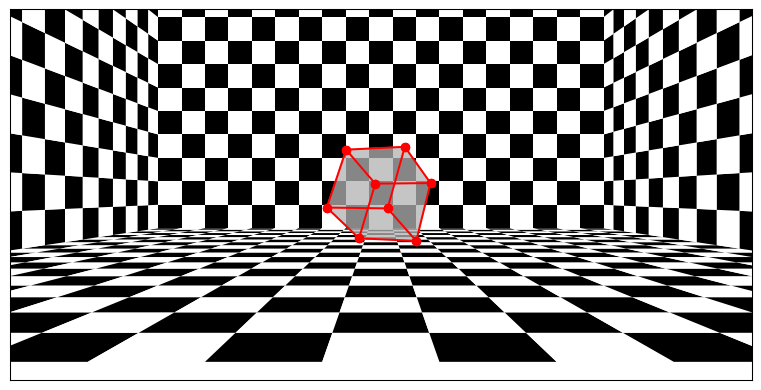

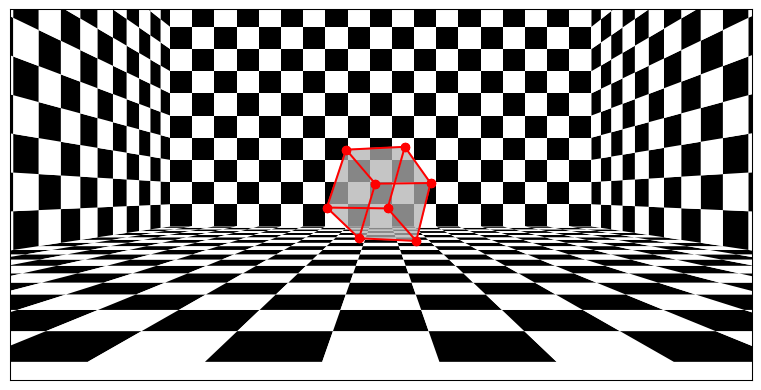

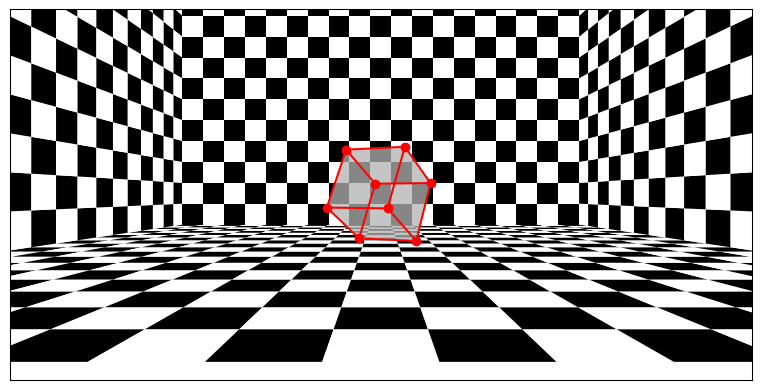

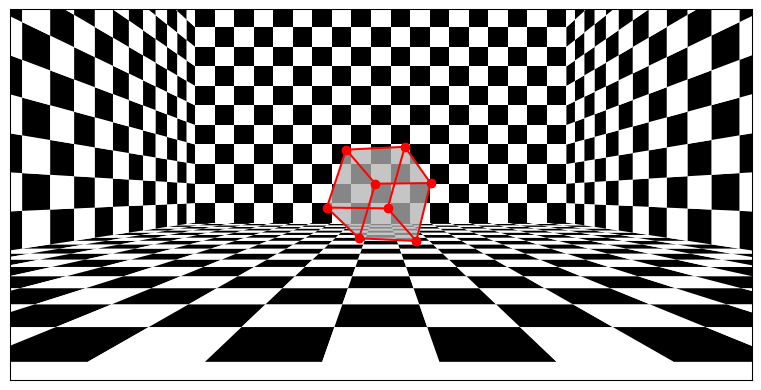

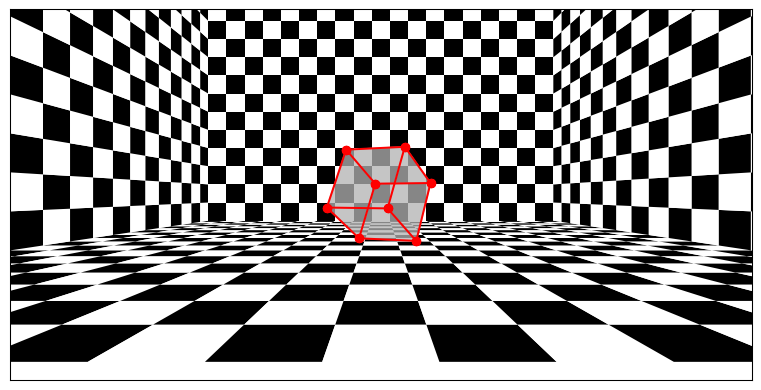

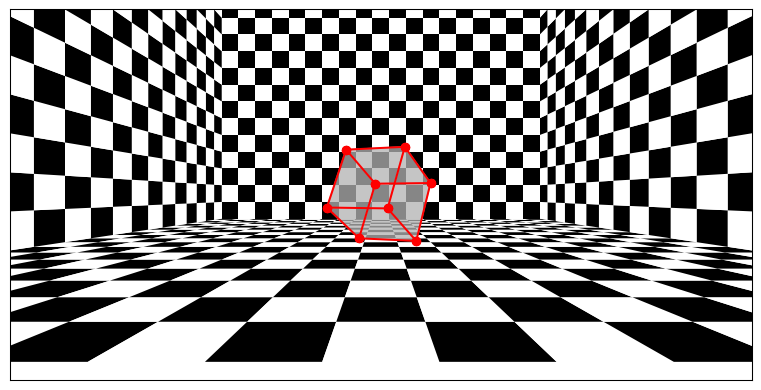

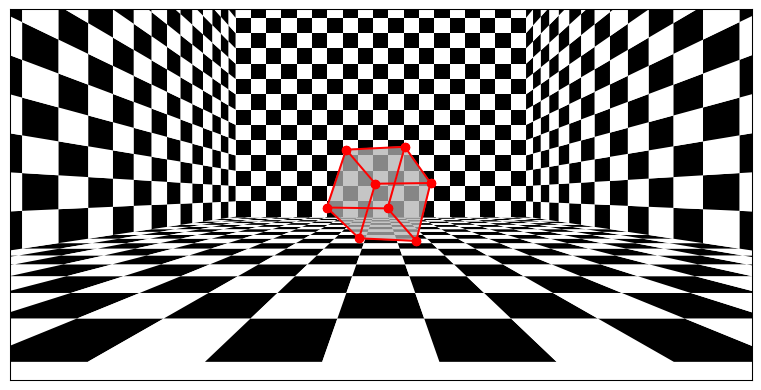

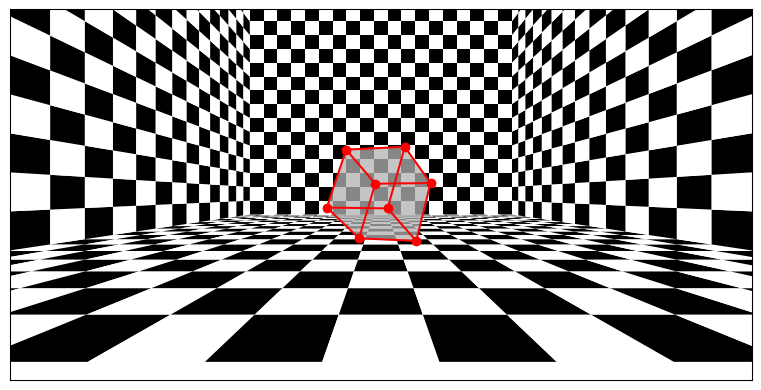

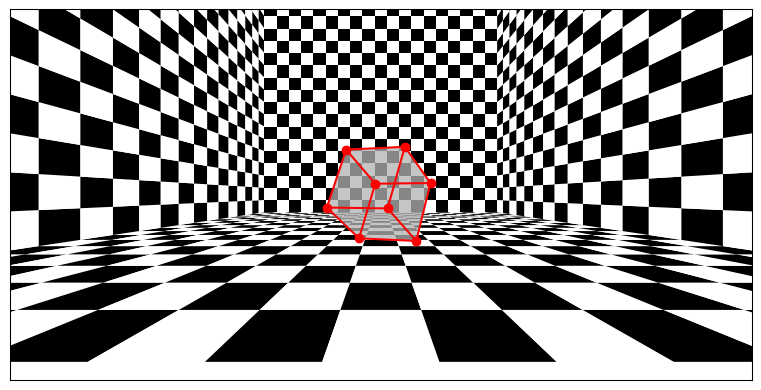

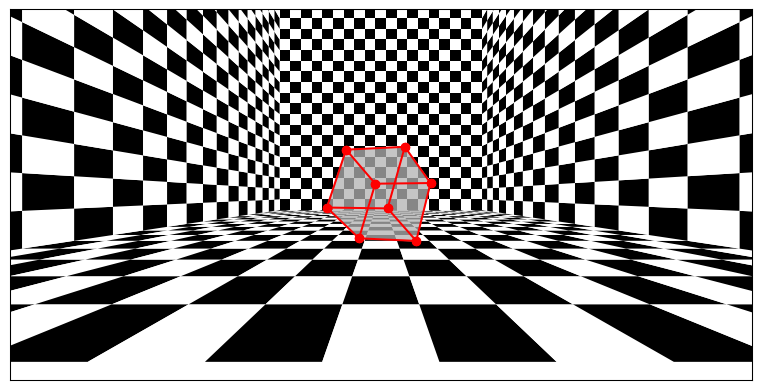

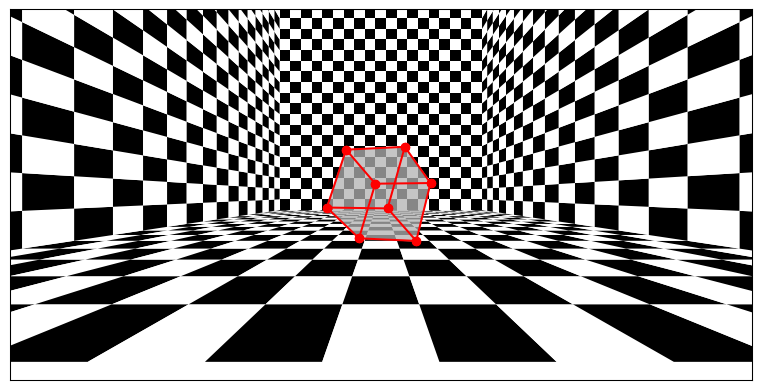

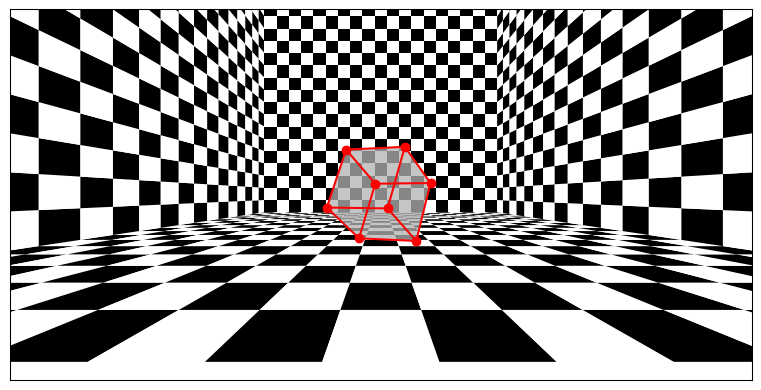

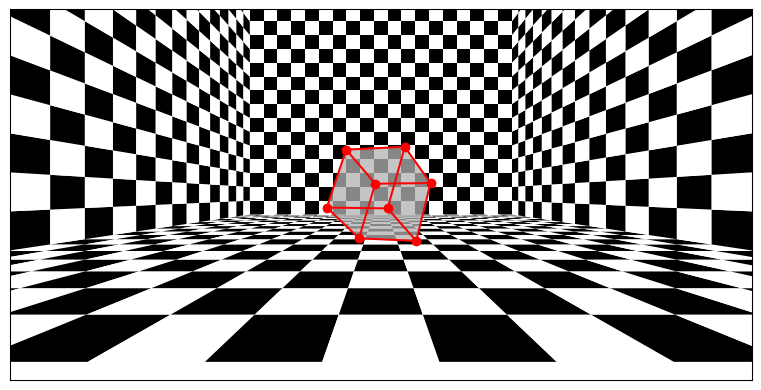

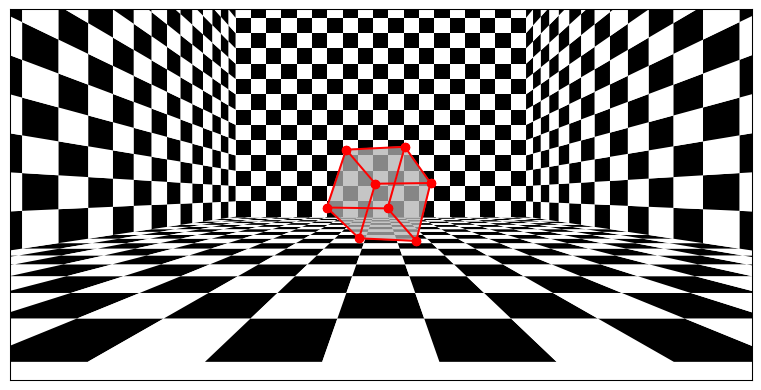

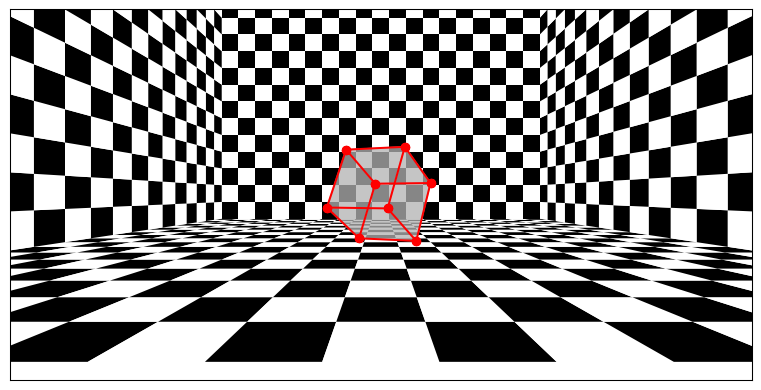

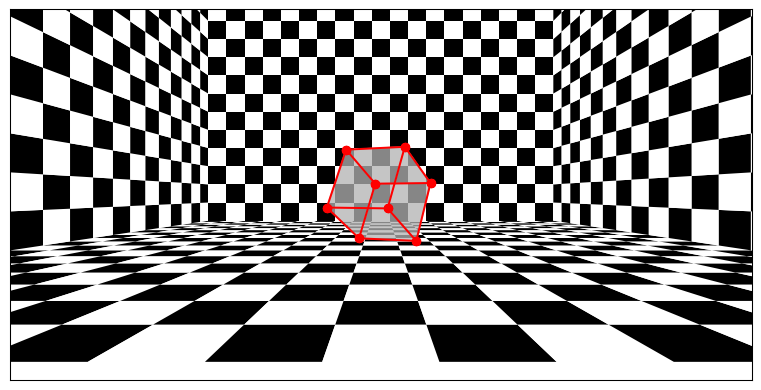

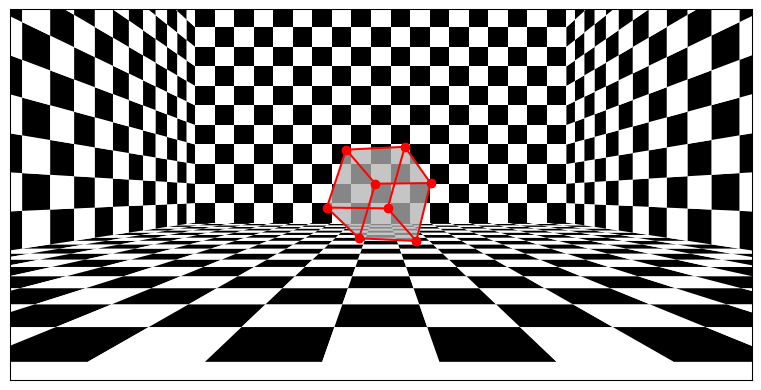

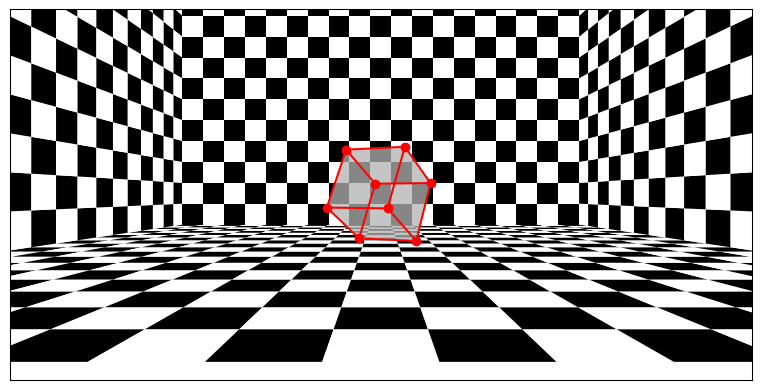

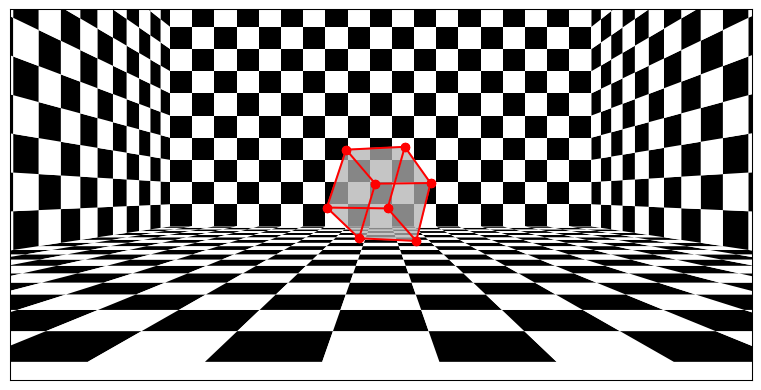

In [ ]:
import copy
import numpy as np
import imageio
import matplotlib.pyplot as plt

# Dolly-zoom parameters
f_start = 0.3
grid_count = 20
Z_start = 100
Z_end   = 40
steps   = 10

# Create array of Z positions for the animation
Tzs = np.linspace(Z_start, Z_end, steps)

# Dolly-zoom formula => keep (f / Z) constant
fs = f_start * (Tzs / Z_start)

# Initialize GIF writer
gif_writer = imageio.get_writer('output.gif', mode='I', fps=5)

# zoom out
for i in range(steps):
    # Build a dictionary of 2D projected objects for this frame
    projected_scene = {}

    for key in scene.keys():
        # Make a copy so we don't overwrite original transforms
        cur_obj = copy.deepcopy(scene[key])

        if key == "cube":
            # Cube: use the same focal length f=0.3 and do NOT change Z
            # (following your original code logic)
            projected_scene[key] = transform_points(cur_obj, 0.3)

        else:
            # Example: "back_plane" transforms differently (multiplied by 5)
            if key != "back_plane":
                cur_obj['transform'][-1] = Tzs[i]       # normal objects
            else:

                cur_obj['transform'][-1] = Tzs[i]+400    # back plane

            # Use the current focal length for the dolly zoom
            focal_length = fs[i]
            projected_scene[key] = transform_points(cur_obj, focal_length)

    # Create the frame as a NumPy image using your existing function
    plot_img = visualize_scene(projected_scene, grid_count)

    # Add this frame to the GIF
    gif_writer.append_data(plot_img)

# zoom in
for i in range(steps-1, 0, -1):

    # Build a dictionary of 2D projected objects for this frame
    projected_scene = {}

    for key in scene.keys():
        # Make a copy so we don't overwrite original transforms
        cur_obj = copy.deepcopy(scene[key])

        if key == "cube":
            # Cube: use the same focal length f=0.3 and do NOT change Z
            # (following your original code logic)
            projected_scene[key] = transform_points(cur_obj, 0.3)

        else:
            # Example: "back_plane" transforms differently (multiplied by 5)
            if key != "back_plane":
                cur_obj['transform'][-1] = Tzs[i]       # normal objects
            else:

                cur_obj['transform'][-1] = Tzs[i]+400    # back plane

            # Use the current focal length for the dolly zoom
            focal_length = fs[i]
            projected_scene[key] = transform_points(cur_obj, focal_length)

    # Create the frame as a NumPy image using your existing function
    plot_img = visualize_scene(projected_scene, grid_count)

    # Add this frame to the GIF
    gif_writer.append_data(plot_img)
# Close the GIF writer
gif_writer.close()
print("GIF saved as 'output.gif'")
